In [2]:
#!pip install flake8
#!pip install pycodestyle
#!pip install pycodestyle_magic
!pip install mglearn
!pip install wordcloud
!pip install opencv-python

!pip install spacy
!pip install Pillow

'pip' n'est pas reconnu en tant que commande interne
ou externe, un programme ex�cutable ou un fichier de commandes.
'pip' n'est pas reconnu en tant que commande interne
ou externe, un programme ex�cutable ou un fichier de commandes.
'pip' n'est pas reconnu en tant que commande interne
ou externe, un programme ex�cutable ou un fichier de commandes.
'pip' n'est pas reconnu en tant que commande interne
ou externe, un programme ex�cutable ou un fichier de commandes.
'pip' n'est pas reconnu en tant que commande interne
ou externe, un programme ex�cutable ou un fichier de commandes.


In [3]:
import pandas as pd
import numpy as np
import nltk
import matplotlib.pyplot as plt
import seaborn as sns

from collections import defaultdict

In [5]:
data = pd.read_csv(r"C:\Users\Jordan\Desktop\flipkart_com-ecommerce_sample_1050.csv",sep=',', error_bad_lines=False, low_memory=False)

C:\Users\Jordan\AppData\Local\Temp\ipykernel_11556\3898044917.py:1: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  data = pd.read_csv(r"C:\Users\Jordan\Desktop\flipkart_com-ecommerce_sample_1050.csv",sep=',', error_bad_lines=False, low_memory=False)


In [6]:
data.head()

,uniq_id,crawl_timestamp,product_url,product_name,product_category_tree,pid,retail_price,discounted_price,image,is_FK_Advantage_product,description,product_rating,overall_rating,brand,product_specifications
0,55b85ea15a1536d46b7190ad6fff8ce7,2016-04-30 03:22:56 +0000,http://www.flipkart.com/elegance-polyester-mul...,Elegance Polyester Multicolor Abstract Eyelet ...,"[""Home Furnishing >> Curtains & Accessories >>...",CRNEG7BKMFFYHQ8Z,1899.0,899.0,55b85ea15a1536d46b7190ad6fff8ce7.jpg,False,Key Features of Elegance Polyester Multicolor ...,No rating available,No rating available,Elegance,"{""product_specification""=>[{""key""=>""Brand"", ""v..."
1,7b72c92c2f6c40268628ec5f14c6d590,2016-04-30 03:22:56 +0000,http://www.flipkart.com/sathiyas-cotton-bath-t...,Sathiyas Cotton Bath Towel,"[""Baby Care >> Baby Bath & Skin >> Baby Bath T...",BTWEGFZHGBXPHZUH,600.0,449.0,7b72c92c2f6c40268628ec5f14c6d590.jpg,False,Specifications of Sathiyas Cotton Bath Towel (...,No rating available,No rating available,Sathiyas,"{""product_specification""=>[{""key""=>""Machine Wa..."
2,64d5d4a258243731dc7bbb1eef49ad74,2016-04-30 03:22:56 +0000,http://www.flipkart.com/eurospa-cotton-terry-f...,Eurospa Cotton Terry Face Towel Set,"[""Baby Care >> Baby Bath & Skin >> Baby Bath T...",BTWEG6SHXTDB2A2Y,NaN,NaN,64d5d4a258243731dc7bbb1eef49ad74.jpg,False,Key Features of Eurospa Cotton Terry Face Towe...,No rating available,No rating available,Eurospa,"{""product_specification""=>[{""key""=>""Material"",..."
3,d4684dcdc759dd9cdf41504698d737d8,2016-06-20 08:49:52 +0000,http://www.flipkart.com/santosh-royal-fashion-...,SANTOSH ROYAL FASHION Cotton Printed King size...,"[""Home Furnishing >> Bed Linen >> Bedsheets >>...",BDSEJT9UQWHDUBH4,2699.0,1299.0,d4684dcdc759dd9cdf41504698d737d8.jpg,False,Key Features of SANTOSH ROYAL FASHION Cotton P...,No rating available,No rating available,SANTOSH ROYAL FASHION,"{""product_specification""=>[{""key""=>""Brand"", ""v..."
4,6325b6870c54cd47be6ebfbffa620ec7,2016-06-20 08:49:52 +0000,http://www.flipkart.com/jaipur-print-cotton-fl...,Jaipur Print Cotton Floral King sized Double B...,"[""Home Furnishing >> Bed Linen >> Bedsheets >>...",BDSEJTHNGWVGWWQU,2599.0,698.0,6325b6870c54cd47be6ebfbffa620ec7.jpg,False,Key Features of Jaipur Print Cotton Floral Kin...,No rating available,No rating available,Jaipur Print,"{""product_specification""=>[{""key""=>""Machine Wa..."


Nous allons commencer par créer un dataset avec uniquement les features qui nous intéresse pour ce projet, et ensuite analyser l'arbre de chaque catégorie de produits de notre jeu de données pour en extraire les sous-catégories.

In [10]:
df_train = data.loc[:, ["description", "product_category_tree"]]

# On crée une liste de strings en supprimant les >>
df = df_train["product_category_tree"].str.split(">>")

# Et on ne récupère que la deuxième valeur de la liste
# Ce qui correspondra à notre catégorie de produits
df_train["sous_cat_1"] = df.apply(lambda x: x[0])
df_train["sous_cat_2"] = df.apply(lambda x: x[1])

In [11]:
print("Il y a {} produits dans la sous-catégorie 1.".format(len(df_train["sous_cat_1"].unique())))
print("Il y a {} produits dans la sous-catégorie 2.".format(len(df_train["sous_cat_2"].unique())))

Il y a 7 produits dans la sous-catégorie 1.
Il y a 63 produits dans la sous-catégorie 2.


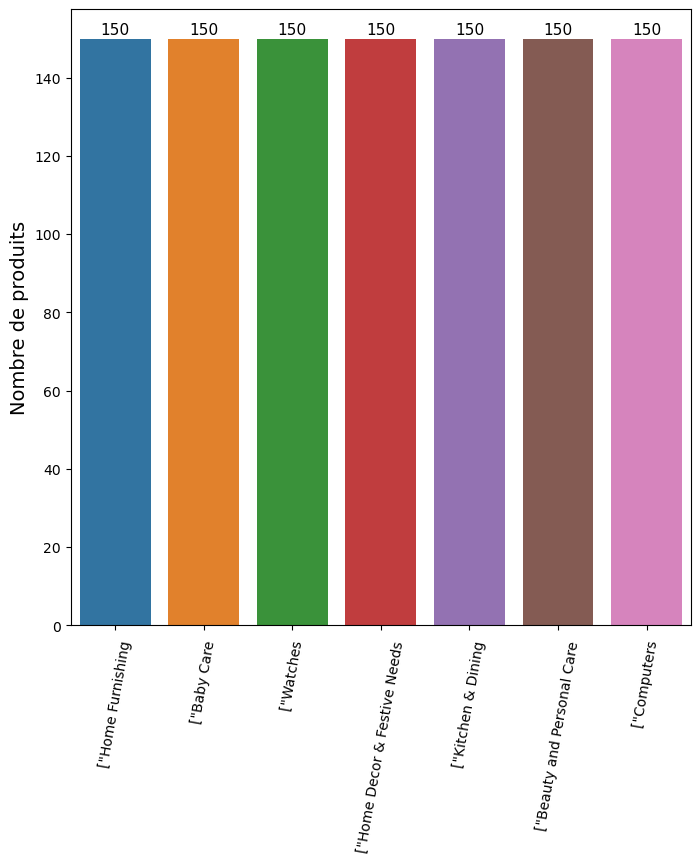

In [12]:
# On commence par faire le comptage de la sous catégorie 1
plt.figure(figsize=(8, 8))
    
plt.xticks(rotation=80)

val = df_train["sous_cat_1"].value_counts()
val = pd.DataFrame(val)

sns.barplot(x=val.index, y=val["sous_cat_1"])

plt.ylabel("Nombre de produits", size=14)

for i, v in enumerate(val["sous_cat_1"].values):
    plt.text(i, v+1, v, color='black', ha='center', size=11)

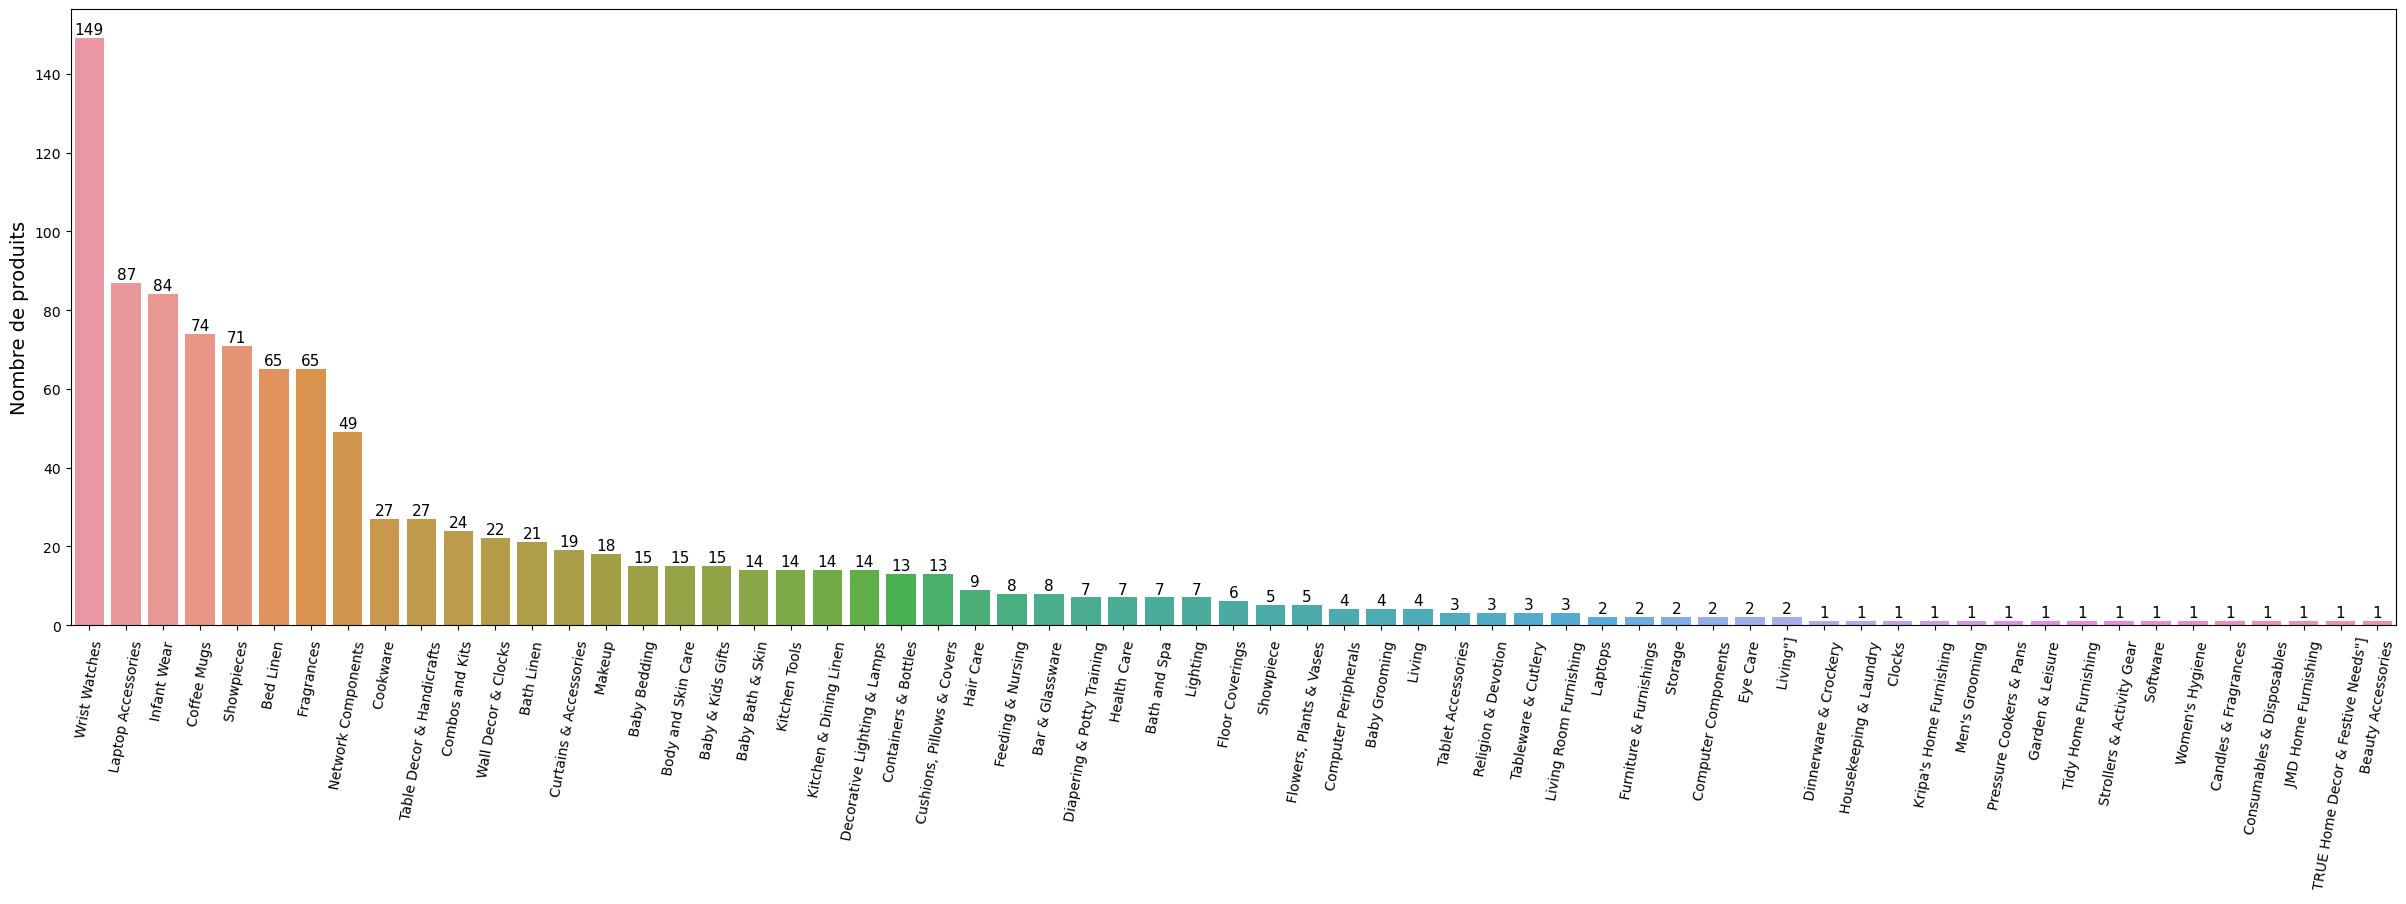

In [13]:
# On commence par faire le comptage de la sous catégorie 1
plt.figure(figsize=(30, 8))
    
plt.xticks(rotation=80)

val = df_train["sous_cat_2"].value_counts()
val = pd.DataFrame(val)

sns.barplot(x=val.index, y=val["sous_cat_2"])

plt.ylabel("Nombre de produits", size=14)

for i, v in enumerate(val["sous_cat_2"].values):
    plt.text(i, v+1, v, color='black', ha='center', size=11)